# **Lab 2: Support Vector Machine (SVM)- Hard Margin**

# **This Lab is 2% of total weight**

By the end of this lab, you will:
1. Understand the concept of Hard Margin SVM.
2. Learn how to implement SVM using Python.
3. Visualize decision boundaries and margins.
4. Complete coding exercises to reinforce your understanding.


# **What is Support Vector Machine (SVM)**

A Support Vector Machine (SVM) is a supervised machine learning algorithm commonly used for classification and regression tasks. It is particularly effective in solving problems involving high-dimensional data or cases where the number of features exceeds the number of samples.

# **Applications of SVM:**

* Image classification
* Text categorization (e.g., spam detection)
* Bioinformatics (e.g., cancer classification)
* Handwriting recognition
* Stock market prediction

SVM is a robust and versatile algorithm that excels in many classification and regression tasks, particularly with small to medium-sized datasets and complex relationships.

# **When to use SVM?**

1. High-Dimensional Data:
SVM performs well when the feature space is high-dimensional or when the number of features is greater than the number of samples.
For example, in text classification tasks like spam filtering, where each word is a feature, SVM can handle the sparse and high-dimensional data effectively.

2. Linear or Slightly Non-Linear Separability:
SVM is ideal when the data is linearly separable or can be made linearly separable with a suitable kernel.
If the decision boundary is non-linear, SVM’s kernel trick (e.g., RBF or polynomial kernel) can map data into a higher-dimensional space for separation.

3. Smaller Datasets:
SVM works well on small to medium-sized datasets because it focuses on maximizing the margin with the support vectors and doesn't require a large number of samples for training.
However, for very large datasets, SVMs can become computationally expensive.

4. Clean and Well-Defined Data:
SVM performs best when the data is relatively clean and free of noise, as it is sensitive to outliers.
If the dataset contains significant noise or overlapping classes, the regularization parameter (C) needs careful tuning.

5. Binary or Multi-Class Classification:
SVM is widely used for binary classification tasks (e.g., "yes" or "no" problems).
It can also handle multi-class classification problems, though it requires strategies like one-vs-rest (OvR) or one-vs-one (OvO) to achieve this.

6. When Interpretability of the Decision Boundary Matters:
SVMs provide a clear and interpretable decision boundary, especially for linear classification tasks.
They are useful when you need to understand the margin and the critical points influencing the model (support vectors).

# **When NOT to use SVM**


1. Large Datasets: SVMs can be computationally expensive and slow for datasets with millions of samples. Algorithms like Random Forests, Gradient Boosting, or Neural Networks might be better in these cases.

2. Highly Overlapping or Noisy Data: If classes are heavily overlapping or noisy, SVM might struggle unless carefully tuned.
3. When Scalability Is Crucial:
For real-time applications or streaming data, other algorithms like logistic regression or decision trees may be preferable.

# **Key Concepts of SVM:**
* **Hyperplane:** A hyperplane is a decision boundary that separates different classes in the feature space. The SVM algorithm tries to find the hyperplane that best separates the classes.
* **Margin:** The margin is the distance between the hyperplane and the closest data points from each class (called support vectors). SVM aims to maximize this margin to improve generalization.
* **Support Vectors:** Support vectors are the data points that are closest to the hyperplane and influence its position and orientation. They are critical for defining the decision boundary.
* **Kernel:** SVM can efficiently handle non-linear decision boundaries by using kernel functions. These functions transform the original feature space into a higher-dimensional space where a linear hyperplane can separate the data. Common kernels include:
1. Linear Kernel
2. Polynomial Kernel
3. Radial Basis Function (RBF) Kernel
4. Sigmoid Kernel
* Slack Variables: In cases where data is not perfectly separable, SVM introduces slack variables to allow some misclassification. This is controlled by a regularization parameter (C) that balances the trade-off between maximizing the margin and minimizing classification error.


**Advantages of SVM:**
* Effective in high-dimensional spaces.
Works well when the number of dimensions exceeds the number of samples.
* Memory-efficient since it uses only a subset of training points (support vectors).
* Versatile with the kernel trick for non-linear separations.

**Disadvantages of SVM:**
* Computationally intensive for large datasets.
* Performance depends on the choice of kernel and hyperparameters.
* May not perform well if classes are heavily imbalanced or if noise is significant.


**Hyperplane in SVM:**

A hyperplane in the context of Support Vector Machines (SVM) is a decision boundary that separates data points in a feature space. It is a geometric construct used to divide different classes in classification problems. Let's see the example below to describe hyperplane.

Hyperplane equation: 0.247 * x1 + -0.174 * x2 + 0.734 = 0


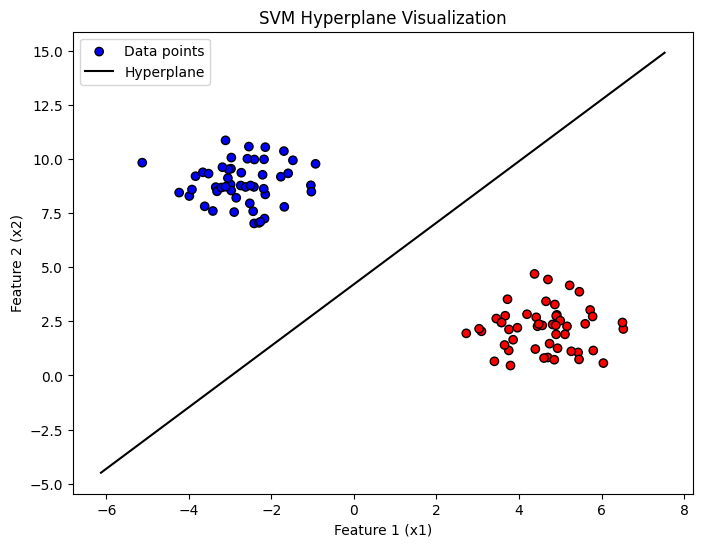

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# Generate synthetic dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.0)

# Convert labels to 0 and 1
y = 2 * y - 1  # Convert labels to -1 and +1

# Train an SVM model
model = SVC(kernel='linear', C=1e10)  # Large C for hard margin
model.fit(X, y)

# Get hyperplane parameters
w = model.coef_[0]  # Coefficients
b = model.intercept_[0]  # Intercept

# Print hyperplane equation
print(f"Hyperplane equation: {w[0]:.3f} * x1 + {w[1]:.3f} * x2 + {b:.3f} = 0")

# Visualize the hyperplane
x0 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
x1 = -(w[0] * x0 + b) / w[1]  # Compute x2 from the hyperplane equation

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', label="Data points")
plt.plot(x0, x1, 'k-', label="Hyperplane")
plt.legend()
plt.title("SVM Hyperplane Visualization")
plt.xlabel("Feature 1 (x1)")
plt.ylabel("Feature 2 (x2)")
plt.show()


**Equation of a Hyperplane:**

In 𝑛- dimensional space, a hyperplane is defined as:

`𝑤^𝑇𝑥+𝑏=0`

* 𝑤: Weight vector (determines the orientation of the hyperplane)
* 𝑥: Input feature vector
* 𝑏: Bias term (determines the offset of the hyperplane)

**Dimensionality:**
* In a 2D space, the hyperplane is a line.
* In a 3D space, the hyperplane is a plane.
In higher dimensions (𝑛 dimensional space), the hyperplane is an
(𝑛−1) dimensional flat subspace.

**Separation:**
The hyperplane divides the feature space into two halves, each corresponding to a different class in binary classification.
For example:
* Points on one side of the hyperplane belong to one class (𝑦=1).
* Points on the other side belong to the other class (𝑦=−1).


# **Margin:**

In Support Vector Machines (SVM), the margin is a key concept that represents the distance between the decision boundary (hyperplane) and the closest data points from each class (called support vectors). There are different types of margins, depending on how the data is distributed and how SVM handles separability and classification.

**1. Hard Margin:** A hard margin assumes that the data is perfectly linearly separable, meaning all data points can be correctly classified without any misclassification.

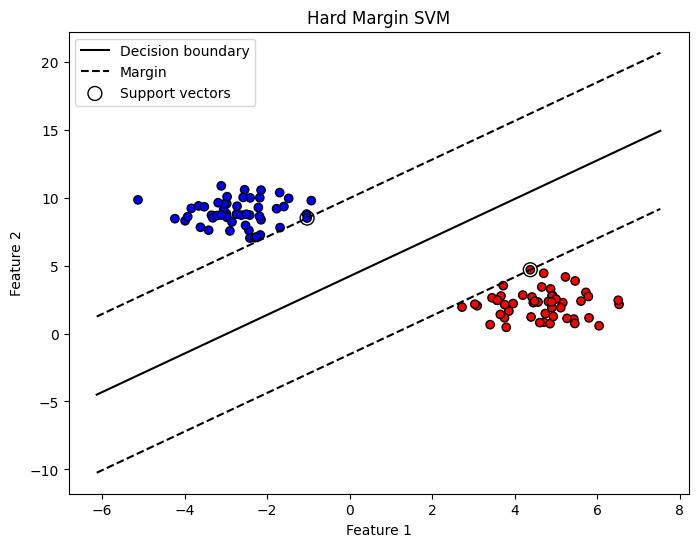

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# Generate dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.0)

# Convert the labels to +1 and -1
y = 2 * y - 1

# Create and fit the hard margin SVM model
# In scikit-learn, hard margin is achieved by setting C (regularization parameter) to a very large value
model = SVC(kernel='linear', C=1e10)
model.fit(X, y)

# Get the separating hyperplane
w = model.coef_[0]  # Coefficients for the hyperplane
b = model.intercept_[0]  # Intercept for the hyperplane

# Plot the decision boundary and margin
x0 = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
x1 = -(w[0] * x0 + b) / w[1]  # Decision boundary
x1_margin_up = -(w[0] * x0 + b - 1) / w[1]  # Positive margin
x1_margin_down = -(w[0] * x0 + b + 1) / w[1]  # Negative margin

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

# Plot the decision boundary and margins
plt.plot(x0, x1, 'k-', label='Decision boundary')
plt.plot(x0, x1_margin_up, 'k--', label='Margin')
plt.plot(x0, x1_margin_down, 'k--')

# Highlight support vectors
plt.scatter(
    model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=100,
    facecolors='none',
    edgecolors='k',
    label='Support vectors',
)

plt.legend()
plt.title('Hard Margin SVM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Before starting the activity, you MUST Answer the following questions to demonstrate your understanding on the above code shown.



---



1. What is support vector in the above diagram?

*Support vectors are the data points closest to the decision boundary. They influence the position and orientation of the hyperplane. In the diagram, these points are highlighted with circles around them and are critical for defining the margins.*




---





2. What is your understanding about the Margin in the above diagram?


*The margin is the distance between the decision boundary and the closest data points (the support vectors) from each class. The goal of the SVM is to maximize this margin, creating the widest possible separation between classes while maintaining correct classification for the training data.*




---



# Activity 1: Visualizing Hard Margin SVM [10 marks]

Run the following code to generate a synthetic dataset and visualize it then complete the following questions.

1. What do you observe about the dataset?
2. How many features does this dataset have?


Write your Answer Here:



---



1.   What do you observe about the dataset?


*The dataset shows two distinct clusters that are linearly separable. The data points belonging to one cluster are marked with one label, while the other cluster is marked with the opposite label. The plot also demonstrates that there is a clear margin between the two classes.*




---



2.   How many features does this dataset have?


*This dataset has two features, as evident from the two axes of the scatter plot (Feature 1 and Feature 2).*




---










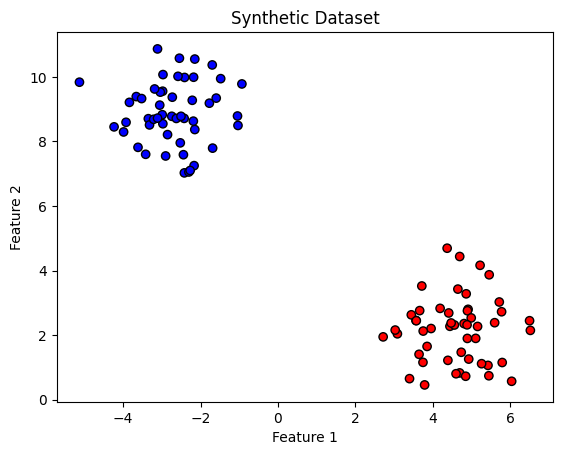

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.0)
y = 2 * y - 1  # Convert labels to -1 and 1

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("Synthetic Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()




# **Training SVM Model**

In [ ]:
from sklearn.svm import SVC

# Train a Hard Margin SVM
model = SVC(kernel='linear', C=1e10)
model.fit(X, y)

# Get hyperplane parameters
w = model.coef_[0]
b = model.intercept_[0]

print(f"Hyperplane equation: {w[0]:.3f} * x1 + {w[1]:.3f} * x2 + {b:.3f} = 0")


Hyperplane equation: 0.247 * x1 + -0.174 * x2 + 0.734 = 0


# **Activity 2: Plotting the Hyperplane [20 marks]**
Complete the following code to plot the decision boundary and margins:


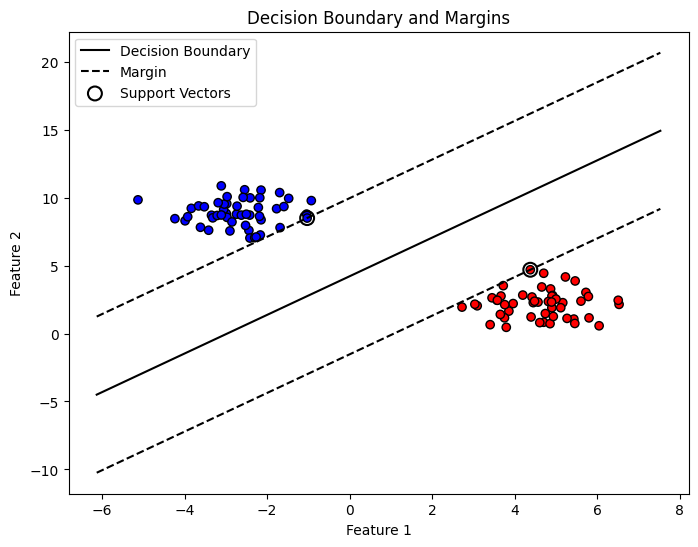

In [ ]:
x0 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)

# Write your code to calculate x1 for the decision boundary and margins [6 marks]

x1_decision = -(w[0] * x0 + b) / w[1]           # Decision boundary
x1_margin_up = -(w[0] * x0 + b - 1) / w[1]      # Upper margin
x1_margin_down = -(w[0] * x0 + b + 1) / w[1]    # Lower margin


# Plot the decision boundary and margins [6 marks]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.plot(x0, x1_decision, 'k-', label='Decision Boundary')
plt.plot(x0, x1_margin_up, 'k--', label='Margin')
plt.plot(x0, x1_margin_down, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')
plt.title("Decision Boundary and Margins")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()




# **Activity 2: Discussion [8 marks]**
* Identify the support vectors from the above output and explain their role.

Write your answer Here:



---



*Support vectors are the points closest to the decision boundary. They determine the position of the hyperplane, making them the most critical points in the dataset for the SVM model. Other data points have no impact on the boundary's position.*



---



# **Activity 3: Applying SVM to Breast Cancer Dataset [10 marks]**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data[:, :2]  # Use the first two features for simplicity
y = cancer.target

# Write neccessary codes to Preprocess the data

scaler = StandardScaler()                                                       # Initialize the scaler
X_scaled = scaler.fit_transform(X)                                              # Scale the features

# Write neccessary codes to split the data

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)  # Split the data

# Write neccessary codes to Train an SVM

model = SVC(kernel='linear', C=1e10, random_state=42)                            # Initialize a linear SVM
model.fit(X_train, y_train)                                                     # Train the SVM model on the training data

# Write neccessary codes to Evaluate the model

y_pred = model.predict(X_test)                                                  # Predict the labels for the test set
accuracy = accuracy_score(y_test, y_pred)                                       # Calculate the accuracy of the model
print("Accuracy:", accuracy)                                                    # Print the accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))        # Print performance metrics


Accuracy: 0.9005847953216374
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.79      0.85        63
           1       0.89      0.96      0.92       108

    accuracy                           0.90       171
   macro avg       0.91      0.88      0.89       171
weighted avg       0.90      0.90      0.90       171



# **Activity 4: Complete the following: [10 marks]**
1. Plot the decision boundary for the training set.
2. Experiment with different features and observe the results.

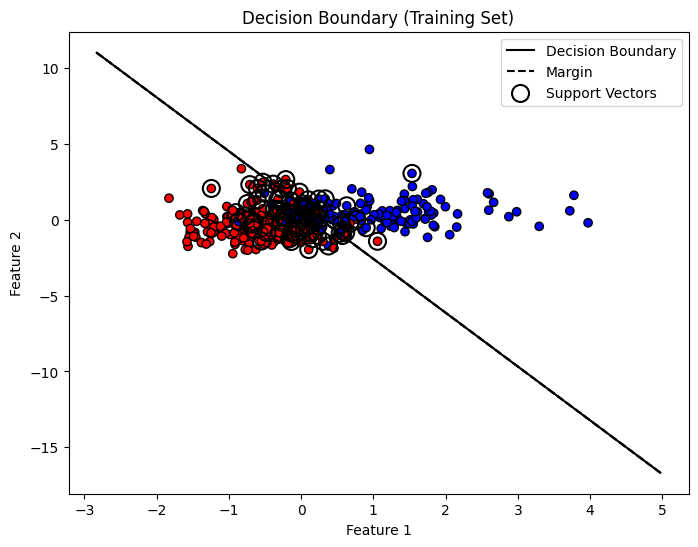

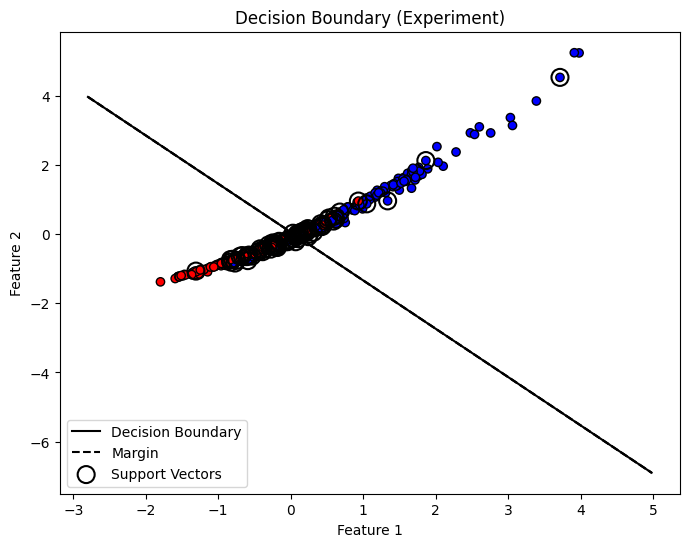

In [10]:
# Write your code here for Activity 4


# Plot the decision boundary for the training set using Margins

def plot_db(X, y, model, title):

    # Get hyperplane parameters

    w = model.coef_[0]
    b = model.intercept_[0]

    # Decision boundary and margins

    x0 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    x1_decision = -(w[0] * x0 + b) / w[1]                                       # Decision boundary
    x1_margin_up = -(w[0] * x0 + b - 1) / w[1]                                  # Upper margin
    x1_margin_down = -(w[0] * x0 + b + 1) / w[1]                                # Lower margin

    # Plot

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.plot(x0, x1_decision, 'k-', label='Decision Boundary')
    plt.plot(x0, x1_margin_up, 'k--', label='Margin')
    plt.plot(x0, x1_margin_down, 'k--')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=150,
                facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()


# Plot decision boundary for the training set

plot_db(X_train, y_train, model, "Decision Boundary (Training Set)")

# Experiment with different features

X_exp = cancer.data[:, 2:4]
X_exp_scaled = scaler.fit_transform(X_exp)                                      # Scale the features
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(
    X_exp_scaled, y, test_size=0.3, random_state=42
)

# Train a new SVM model with the new features

model_exp = SVC(kernel='linear', C=1e10, random_state=42)
model_exp.fit(X_train_exp, y_train_exp)

# Plot decision boundary for the new features using Margins

plot_db(X_train_exp, y_train_exp, model_exp, "Decision Boundary (Experiment)")


*Both clustering of the training set and also of the experiment features leads to a narrower margin and slightly more challenging separation, especially for the experiment features.*

*The current SVM is using a linear kernel, which is limited to linear decision boundaries. If the classes are not linearly separable (or only marginally separable), the model struggles.*

*Both feature sets exhibit overlapping or tightly clustered points, making it difficult for a simple decision boundary to achieve high performance.*